# **SUBMISSION**
***Proyek Pertama : Predictive Analytics***


---


Nama : Alfi Safira Az Zahrah

Kelas : Pengembang Machine Learning & Front-End Web

Kelompok : M-06

E-mail : alfisafira69@gmail.com

---

**Konteks**

Pada Proyek Pertama dengan studi kasus _Predictive Analytics_ ini, penulis memilih domain proyek Kesehatan. Model yang akan dibuat yakni model untuk prediksi probabilitas gagal jantung berdasarkan fitur-fitur yang ada dengan menerapkan 3 algoritma _Machine Learning_, yakni K-Nearest Neighbor (KNN), Random Forest, dan Boosting Algorithm.

**Dataset**

Dataset yang digunakan yakni [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) dari Kaggle.com

## **Import Library yang dibutuhkan**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# data preparation
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model development
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# install paket kaggle
!pip install -q kaggle

# Upload file kaggle.json dari Create New API Token Akun Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alfisafira","key":"dce233816e86f0a03dc21498a1b50490"}'}

## **Load Dataset**

In [4]:
import opendatasets as od

dataset_url= 'https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction'
od.download('https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction')

100%|██████████| 8.56k/8.56k [00:00<00:00, 5.27MB/s]

In [5]:
ds = pd.read_csv('/content/heart-failure-prediction/heart.csv')
ds

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**Keterangan :**
Berdasarkan output di atas diperoleh informasi sebagai berikut:
* Terdapat 918 baris sampel data (_records_) yang terdapat dalam dataset
* Terdapat 12 kolom variabel

## **Exploratory Data Analysis**


---



### **Deskripsi Variabel**

1. Age : Usia pasien [years]
2. Sex : Jenis kelamin pasien [M: Male, F: Female]
3. ChestPainType : Tipe nyeri dada [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP : Tekanan darah istirahat [mm Hg]
5. Cholesterol : Kolesterol serum [mm/dl]
6. FastingBS : Gula darah puasa [1: jika FastingBS > 120 mg/dl, 0: sebaliknya]
7. RestingECG : Hasil elektrokardiogram istirahat [Normal: Normal, ST: Memiliki kelainan gelombang ST-T (pembalikan gelombang T dan/atau elevasi atau depresi ST > 0.05 mV, LVH: Menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut Estes' criteria]
8. MaxHR : Detak jantung maksimum tercapai [Nilai numerik antara 60 dan 202]
9. ExerciseAngina : Angina yang diinduksi oleh olahraga [Y: Ya, N: Tidak]
10. Oldpeak : oldpeak = ST [Nilai numerik diukur dalam depresi]
11. ST_Slope : Kemiringan puncak latihan segmen ST [Up: Upsloping, Flat: Flat, Down: Downsloping] 
12. HeartDisease : Keluaran [1: Penyakit jantung, 0: Normal]

Setelah memahami deskripsi variabel pada data, selanjutnya adalah mengecek informasi pada dataset.

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Berdasarkan output di atas dapat terlihat bahwa :
* Terdapat 7 fitur numerik dan 5 fitur kategorik
* 6 fitur numerik bertipe data int64 dan 1 fitur numerik bertipe data float64
* Semua fitur kategorik bertipe data object
* HeartDisease merupakan fitur target

Langkah selanjutnya yakni mengecek deskripsi statistik data menggunakan fungsi describe()

In [7]:
ds.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Berikut informasi-informasi yang ditunjukkan oleh fungsi describe(), antara lain :
* Count : jumlah sample pada data.
* Mean : nilai rata-rata
* Std : standar deviasi
* Min : nilai minimum setiap kolom
* 25% : kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% : kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% : kuartil ketiga.
* Max : nilai maksimum.


### **Mengecek dan Menangani Missing Value**

Mengecek _missing value_ menggunakan fungsi isnull() pada semua kolom. 

In [8]:
ds.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Dari output di atas dapat terlihat bahwa seluruh fitur pada dataset tidak memiliki _missing value_ (nilai NULL maupun NAN) sehingga dapat lanjut ke tahap selanjutnya.

### **Mendeteksi dan Menangani Outliers**

Pendeteksian outliers menggunakan teknik visualisasi data dengan boxplot. Berikut visualisasi data untuk fitur numerik.

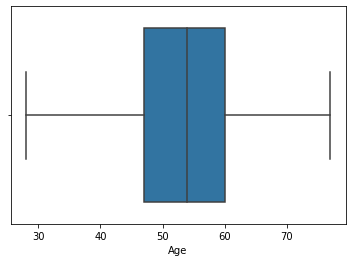

In [9]:
# 1. Age
sns.boxplot(x=ds['Age'])

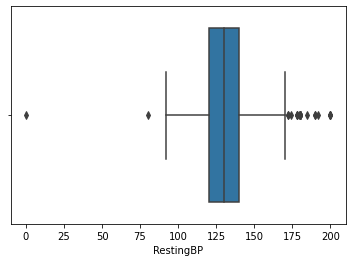

In [10]:
# 2. Resting Blood Pressure
sns.boxplot(x=ds['RestingBP'])

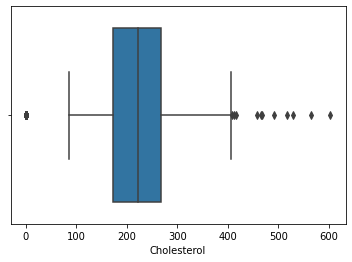

In [11]:
# 3. Cholesterol
sns.boxplot(x=ds['Cholesterol'])

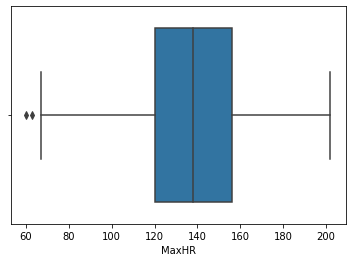

In [12]:
# 4. Maximum Heart Rate
sns.boxplot(x=ds['MaxHR'])

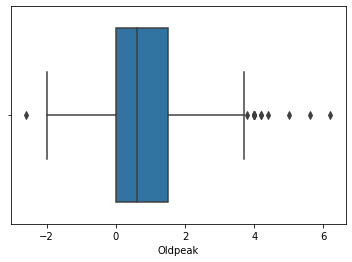

In [13]:
# 5. Old Peak
sns.boxplot(x=ds['Oldpeak'])

Dari output di atas dapat dilihat bahwa terdapat outliers pada fitur numerik `RestingBP`, `Cholesterol`, `MaxHR`, dan `Oldpeak`.

Menangani Outliers dengan metode IQR (Inter Quartile Range).

In [14]:
# membuat batas atas dan batas bawah
Q1 = ds.quantile(0.25)
Q3 = ds.quantile(0.75)
IQR = Q3-Q1

# cek ukuran dataset sebelum kita drop outliers
print(f"Ukuran dataset awal : {ds.shape}")

# penanganan outliers
ds = ds[~((ds<(Q1-1.5*IQR))|(ds>(Q3+1.5*IQR))).any(axis=1)]
 
# cek ukuran dataset setelah kita drop outliers
print(f"Ukuran dataset setelah drop outliers : {ds.shape}")

Ukuran dataset awal : (918, 12)
Ukuran dataset setelah drop outliers : (588, 12)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # Remove the CWD from sys.path while we load stuff.


Dari output di atas dapat terlihat bahwa sebanyak (918 - 588) = 330 baris sampel outliers telah dibersihkan.

## **Univariate Analysis**

Pada tahap ini akan dilakukan analisis data dengan Univariate Analysis pada semua fitur, baik fitur kategorik maupun fitur numerik.

In [15]:
# membagi fitur pd dataset menjadi 2 bagian
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

**Analisis Categorical Features**

Berikut adalah visualisasi distribusi data untuk Categorical Features dalam bentuk bar.

   jumlah sampel  persentase
M            436        74.1
F            152        25.9


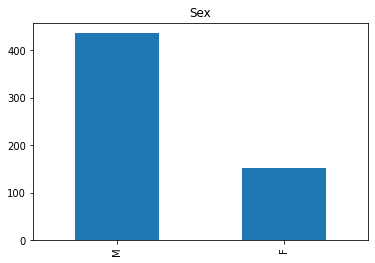

In [16]:
# Fitur Sex
feature = categorical_features[0]
count = ds[feature].value_counts()
percent = 100*ds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
ASY            278        47.3
ATA            144        24.5
NAP            137        23.3
TA              29         4.9


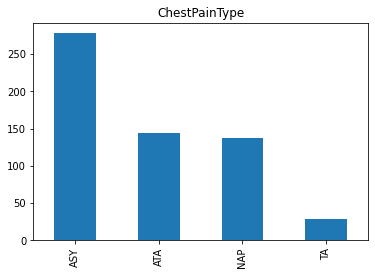

In [17]:
# Fitur Chest Pain Type
feature = categorical_features[1]
count = ds[feature].value_counts()
percent = 100*ds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

        jumlah sampel  persentase
Normal            375        63.8
LVH               131        22.3
ST                 82        13.9


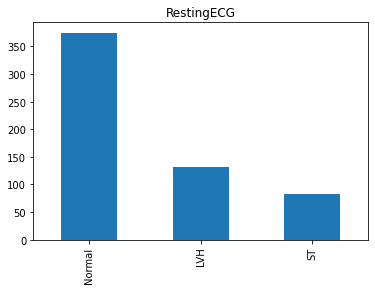

In [18]:
# Fitur Resting Electro Cardio Gram
feature = categorical_features[2]
count = ds[feature].value_counts()
percent = 100*ds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
N            381        64.8
Y            207        35.2


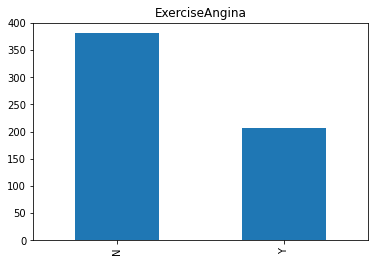

In [19]:
# Fitur Exercise Angina
feature = categorical_features[3]
count = ds[feature].value_counts()
percent = 100*ds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

      jumlah sampel  persentase
Up              302        51.4
Flat            263        44.7
Down             23         3.9


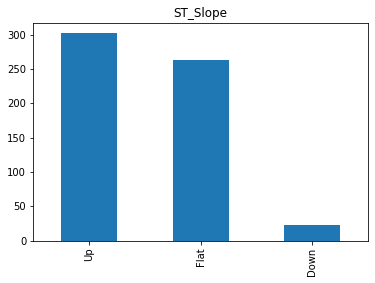

In [20]:
# Fitur ST Slope
feature = categorical_features[4]
count = ds[feature].value_counts()
percent = 100*ds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);



---

**Analisis Numerical Features**

Kemudian untuk melihat distribusi data pada tiap fitur numerik akan digunakan visualisasi dengan histogram sebagai berikut:

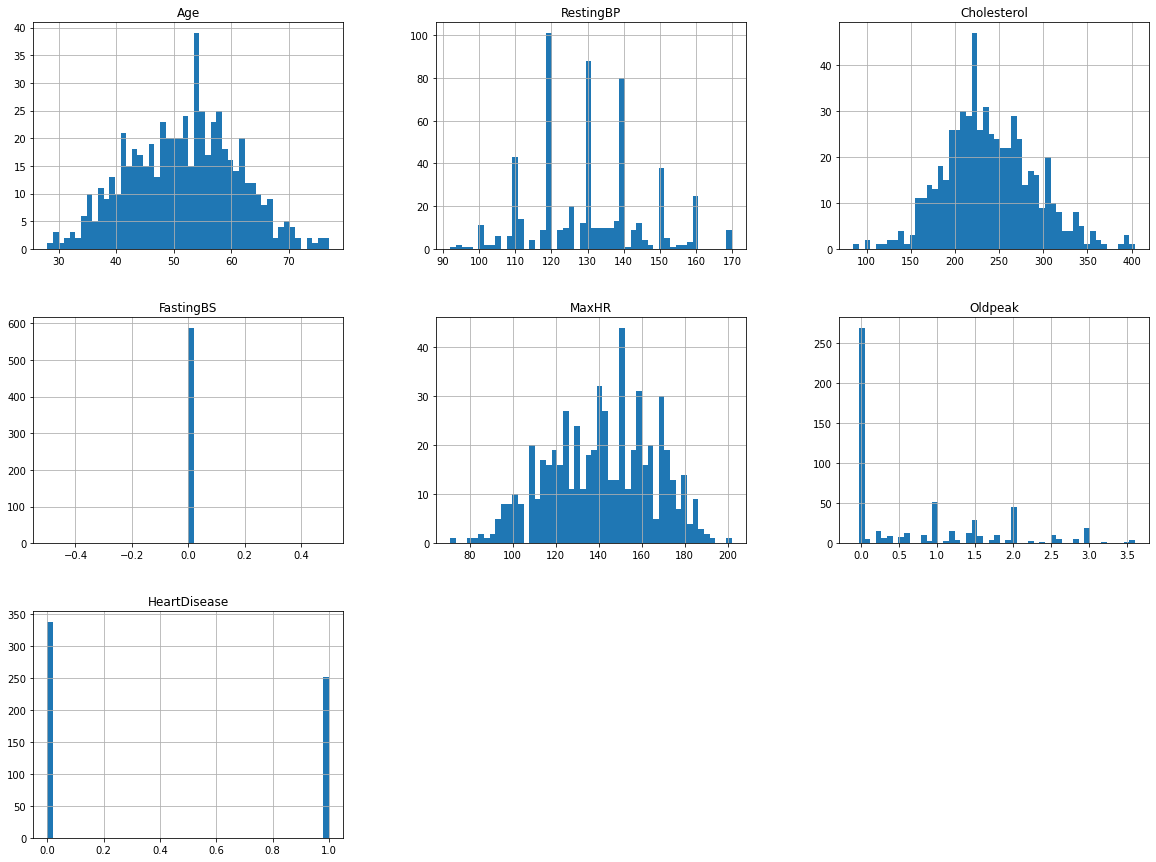

In [21]:
# menampilkan histogram masing2 fitur numerik
ds.hist(bins=50, figsize=(20,15))
plt.show()

## **Multivariate Analysis**

Multivariate Analysis menunjukkan hubungan antara dua atau lebih variabel pada data. Selanjutnya akan dilakukan proses analisa data dengan teknik Multivariate Analysis baik untuk fitur numerikal maupun fitur kategorikal. 


**Analisis Categorical Features**

* Pada tahap ini akan dilakukan pengecekan rata-rata probabilitas Heart Disease terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap Heart Disease.

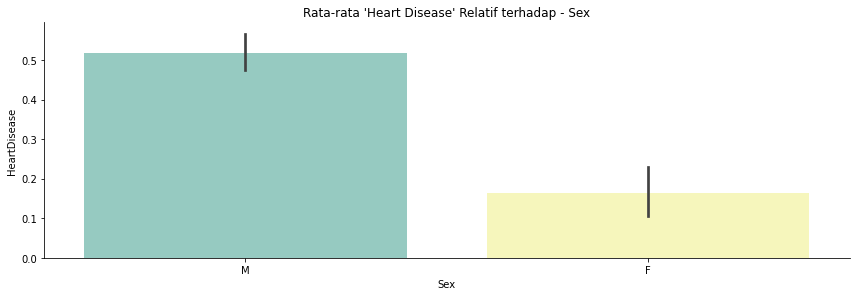

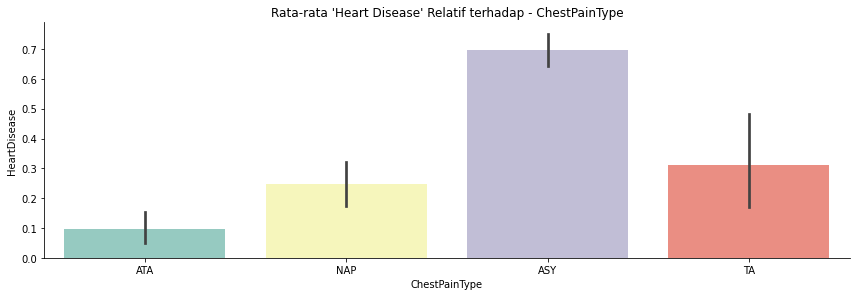

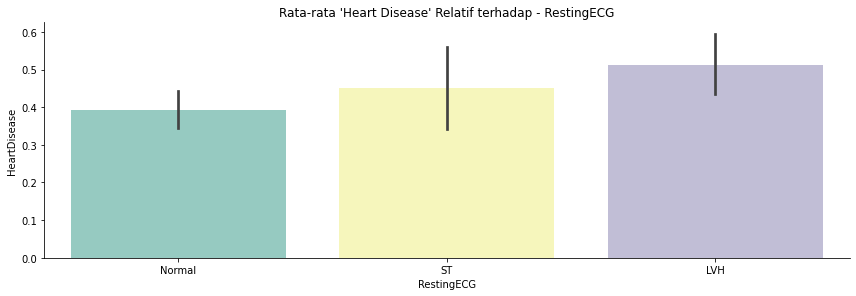

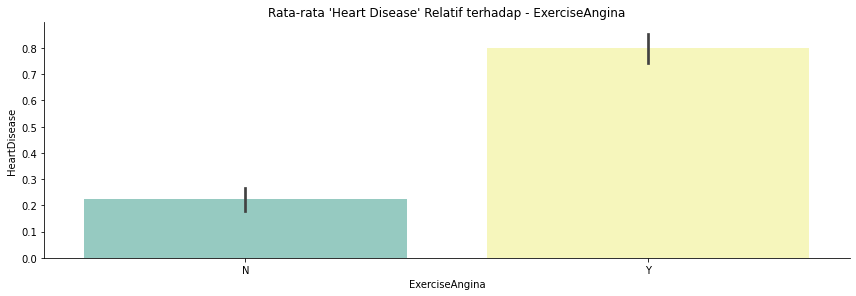

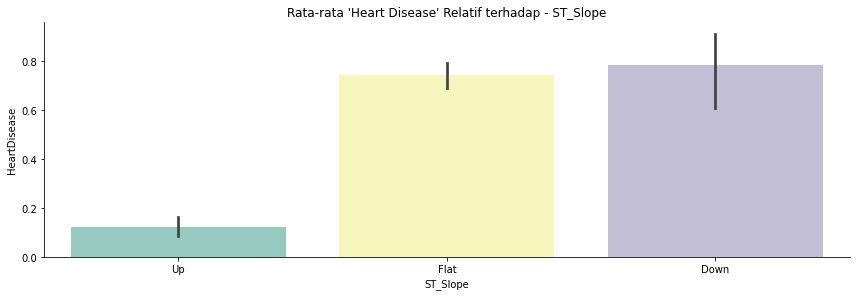

In [22]:
cat_features = ds.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="HeartDisease", kind="bar", dodge=False, height = 4, aspect = 3,  data=ds, palette="Set3")
  plt.title("Rata-rata 'Heart Disease' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata Heart Disease relatif terhadap fitur kategori di atas, maka diperoleh insight sebagai berikut:

- Pada fitur `Sex`, rata-rata Heart Disease cenderung lebih tinggi untuk Male dibandingkan dengan Female.

- Pada fitur `ChestPainType`, dapat terlihat bahwa tipe nyeri dada ASY memiliki nilai tinggi terhadap rata-rata relatif Heart Disease.

- Pada fitur `RestingECG`, rata-rata Heart Disease cenderung mirip dan tidak terlalu berbeda. Hal ini dapat berarti bahwa fitur 'RestingECG' memiliki pengaruh yang rendah terhadap Heart Disease. 

- Pada fitur `ExerciseAngina`, rata-rata Heart Disease cenderung lebih tinggi pada label 'Y'. 

- Pada fitur `ST_Slope`, rata-rata Heart Disease cenderung rendah untuk label 'Up' dan tinggi untuk label 'Down'. Hal ini dapat berarti bahwa fitur 'ST_Slope' memiliki pengaruh rendah terhadap Heart Disease.

**Kesimpulan**, beberapa fitur kategori memiliki pengaruh rendah dan beberapa tidak berpengaruh terhadap Heart Disease.

 

---


 **Analisis Numerical Features**

* Kemudian untuk mengamati hubungan antara fitur numerik, akan digunakan fungsi `pairplot()`, dengan output sebagai berikut: 

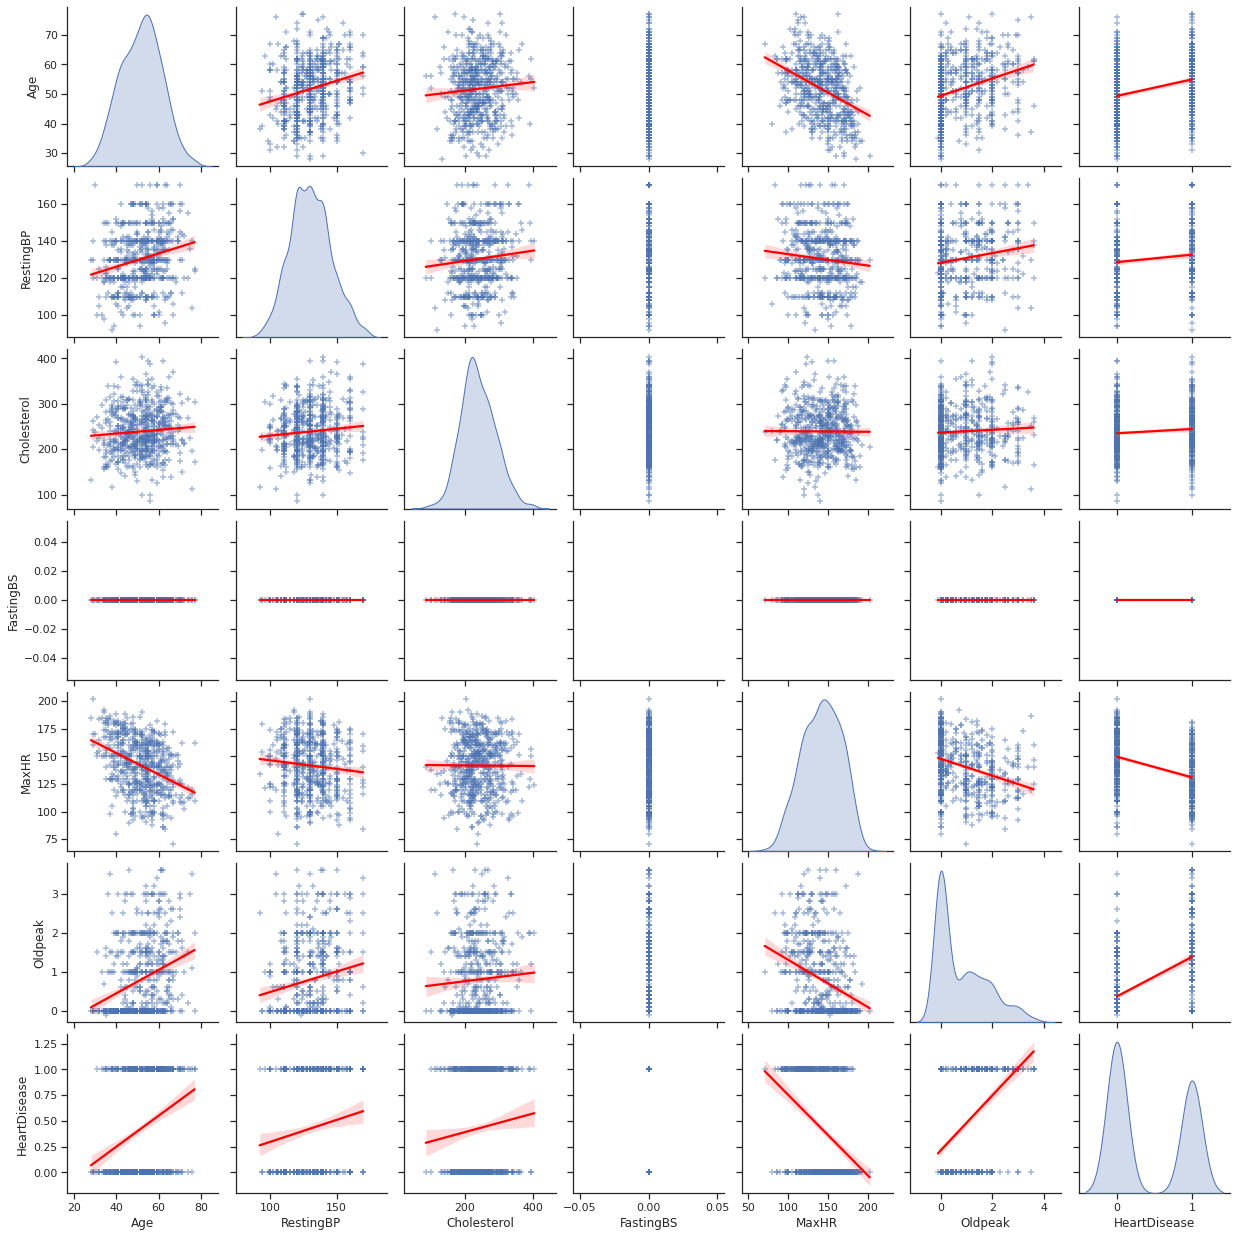

In [23]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.set(style="ticks", color_codes=True)
sns.pairplot(ds,
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

Berdasarkan pengamatan hasil visualisasi pairplot di atas dapat terlihat pola sebaran data pada fitur numerik. Pada pola sebaran tersebut terlihat bahwa fitur `MaxHR` memiliki korelasi negatif/berkebalikan dengan fitur `HeartDisease` (target). Sedangkan fitur `Age`, `RestingBP`, `Cholesterol`, `Oldpeak` memiliki korelasi positif dengan fitur `HeartDisease`.

* Selanjutnya untuk mengevaluasi skor korelasi antara fitur numerik dengan fitur target akan digunakan fungsi corr() seperti berikut.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

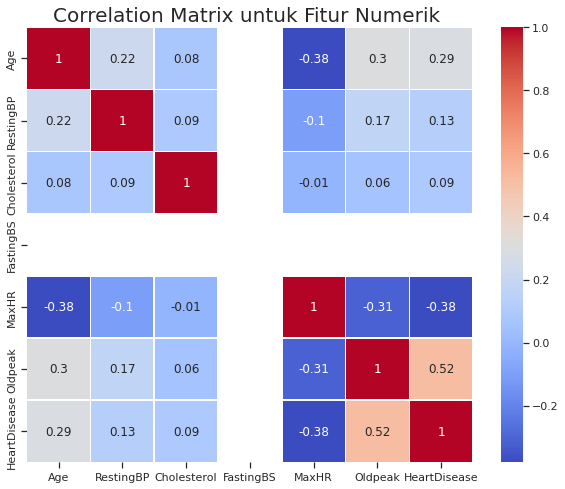

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = ds.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Koefisien korelasi berkisar antara -1 dan +1. Semakin dekat nilainya angka 1 atau -1, maka korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke angka 0 maka korelasinya semakin lemah.

Berdasarkan gambar di atas, dapat dilihat bahwa fitur `Oldpeak` (skor korelasi 0.52) dan `MaxHR` (skor korelasi -0.38) memiliki korelasi yang cukup kuat dengan fitur target HeartDisease dibandingkan dengan fitur-fitur lainnya.

In [25]:
# drop fitur 'Cholesterol' dan 'FastingBS' karena korelasinya kecil
ds.drop(['Cholesterol', 'FastingBS'], inplace=True, axis=1)
ds.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Sex,ChestPainType,RestingBP,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,ST,98,N,0.0,Up,0
3,48,F,ASY,138,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,Normal,122,N,0.0,Up,0


## **Data Preparation**

Data preparation merupakan salah satu tahapan yang penting dalam proses pengembangan model machine learning. Pada tahapan ini akan dilakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

**1. Encoding Fitur Kategori**

Proses encoding fitur kategori dilakukan dengan menggunakan teknik _one-hot-encoding_ dari library scikit-learn. Teknik ini berfungsi untuk mendapatkan fitur baru yang sesuai sehingga dapat mewakili setiap fitur kategori.

In [26]:
ds = pd.concat([ds, pd.get_dummies(ds['Sex'], prefix='Sex')],axis=1)
ds = pd.concat([ds, pd.get_dummies(ds['ChestPainType'], prefix='ChestPainType')],axis=1)
ds = pd.concat([ds, pd.get_dummies(ds['RestingECG'], prefix='RestingECG')],axis=1)
ds = pd.concat([ds, pd.get_dummies(ds['ExerciseAngina'], prefix='ExerciseAngina')],axis=1)
ds = pd.concat([ds, pd.get_dummies(ds['ST_Slope'], prefix='ST_Slope')],axis=1)
ds.drop(['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)
ds.head()

,Age,RestingBP,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


**2. Train Test Split**

Pada proyek ini, pembagian dataset akan menggunakan proporsi pembagian 80:20 dengan fungsi train_test_split dari sklearn.

In [27]:
X = ds.drop(["HeartDisease"],axis =1)
y = ds["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [28]:
# mengecek jumlah sampel
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 588
Total # of sample in train dataset: 470
Total # of sample in test dataset: 118


**3. Standarisasi**

Standarisasi merupakan teknik transformasi yang umum digunakan dalam tahap Data Preparation untuk pemodelan. Tujuan proses standarisasi adalah membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. Pada proyek ini, fitur numerik akan distandarisasi menggunakan teknik `StandarScaler()` dari library scikit-learn.

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0.

In [29]:
# melakukan standarisasi pd data latih

numerical_features = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,RestingBP,MaxHR,Oldpeak
219,-2.375988,0.614750,1.166316,-0.830821
807,0.230722,-1.512198,0.587338,-0.830821
804,1.899016,1.944093,-1.232309,2.078761
879,-0.394889,-1.379264,1.083605,0.172483
265,0.230722,1.944093,1.373094,-0.830821


In [30]:
# mengecek nilai mean & standar deviasi setelah proses standarisasi
X_train[numerical_features].describe().round(2)

,Age,RestingBP,MaxHR,Oldpeak
count,470.00,470.00,470.00,470.00
mean,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-2.48,-2.58,-2.56,-0.93
25%,-0.71,-0.71,-0.73,-0.83
50%,0.07,-0.05,0.01,-0.58
75%,0.65,0.61,0.78,0.67
max,2.63,2.61,2.49,2.78


Dapat dilihat bahwa setelah proses standarisasi sekarang nilai mean = 0 dan standar deviasi = 1.

## **Model Development**

---
Pada proyek ini, pemodelan dilakukan menggunakan tiga algoritma. Kemudian, selanjutnya akan dilakukan evaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Berikut adalah algoritma yang akan digunakan, antara lain : 

**1. K-Nearest Neighbor (KNN)**

* Kelebihan : relatif sederhana, mudah dipahami dan digunakan.
* Kekurangan : jika dihadapkan pada jumlah fitur atau dimensi yang besar rawan terjadi bias (_curse of dimensionality_).

**2. Random Forest**

* Kelebihan : merupakan algoritma yang cukup sederhana tetapi memiliki stabilitas yang mumpuni, menggunakan teknik _bagging_ untuk mengatasi _overfitting_ dengan berjalan secara paralel, dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi.  
* Kekurangan : algoritma yang kompleks dan membutuhkan waktu relatif lebih lama dan daya komputasi yang lebih tinggi dibanding algoritma lain, seperti Decision Tree.

**3. Boosting Algorithm**

* Kelebihan : menggunakan teknik _boosting_ untuk mengurangi bias dengan berjalan secara sekuensial.
* Kekurangan : algoritma yang kompleks dan membutuhkan waktu relatif lebih lama dan daya komputasi yang lebih tinggi dibanding algoritma lain.

---

Langkah yang pertama, siapkan dataframe untuk menampung nilai metrik MSE (_Mean Square Error_) pada setiap model. Hal ini digunakan untuk melakukan analisa perbandingan antar model nantinya.

In [31]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

**1. Model Algoritma K-Nearest Neighbor (KNN)**

Algoritma KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif).

Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang overfit dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k terlalu tinggi, maka model yang dihasilkan akan underfit dan prediksinya memiliki bias yang tinggi [[7]](https://www.oreilly.com/library/view/machine-learning-with/9781617296574/). 

Pada proyek ini kita akan mencoba beberapa nilai k yang berbeda (1 sampai 20), kemudian akan dibandingkan dan dipilih yang menghasilkan nilai metrik model terbaik. Metrik model yang digunakan yakni _mean squared error_ dan metrik ukuran jarak yang digunakan yakni Minkowski Distance pada library sklearn.

In [32]:
list_mse = []
print(f"Nilai MSE \t")
for k in range(1, 21):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_prediction = knn.predict(X_test)
  test_mse = mean_squared_error(y_test, y_prediction)
  list_mse.append(test_mse)
  print(f"untuk k = {k} adalah : {test_mse}")

Nilai MSE 	
untuk k = 1 adalah : 0.3898305084745763
untuk k = 2 adalah : 0.3792372881355932
untuk k = 3 adalah : 0.36723163841807904
untuk k = 4 adalah : 0.3315677966101695
untuk k = 5 adalah : 0.32508474576271185
untuk k = 6 adalah : 0.29755178907721286
untuk k = 7 adalah : 0.2917675544794188
untuk k = 8 adalah : 0.2770127118644068
untuk k = 9 adalah : 0.2680477087256748
untuk k = 10 adalah : 0.2673728813559322
untuk k = 11 adalah : 0.2712564784983891
untuk k = 12 adalah : 0.26877354048964225
untuk k = 13 adalah : 0.26727509778357234
untuk k = 14 adalah : 0.25272397094431
untuk k = 15 adalah : 0.24870056497175144
untuk k = 16 adalah : 0.2507944915254237
untuk k = 17 adalah : 0.24558676910445132
untuk k = 18 adalah : 0.23624189160912326
untuk k = 19 adalah : 0.23231137612094466
untuk k = 20 adalah : 0.22970338983050845


Untuk mempermudah dalam menentukan nilai k terbaik akan dilakukan visualisasi menggunakan fungsi `plot()` untuk nilai MSE yang telah diperoleh sebelumnya.

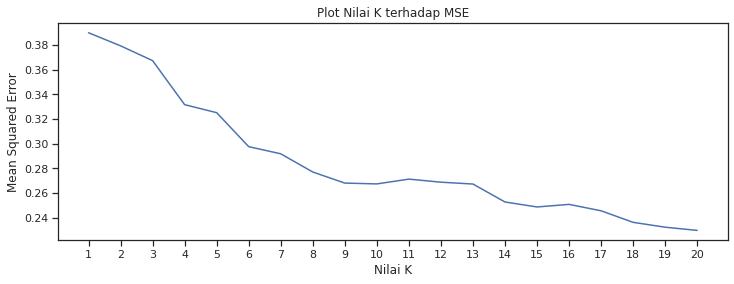

In [33]:
pd.DataFrame(list_mse, index=range(1, 21)).plot(
    xlabel="Nilai K",
    ylabel="Mean Squared Error",
    legend=False,
    xticks=range(1,21), 
    figsize=(12,4),
    title='Plot Nilai K terhadap MSE')

Berdasarkan output di atas dapat terlihat bahwa nilai MSE terbaik (terendah) dicapai ketika nilai `k = 20` yaitu sebesar 0.229. Oleh karena itu pada pemodelan data latih nilai k yang digunakan yakni `k = 20`. Berikut penerapannya.

In [34]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

**2. Model Algoritma Random Forest**

Algoritma random forest merupakan salah satu algoritma supervised learning yang dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. 

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir. 

Pada proyek ini kita akan menggunakan `RandomForestRegressor` dari library scikit-learn. Berikut parameter-parameter yang digunakan :
* n_estimator: jumlah trees (pohon) di forest.
* max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
* random_state: digunakan untuk mengontrol random number generator yang digunakan.
* n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

Untuk menentukan nilai parameter (`n_estimators` dan `max_depth`) terbaik, kita akan melakukan tuning dengan `GridSearchCV`, berikut penerapannya. 

In [35]:
model = RandomForestRegressor()
parameters = {
    "n_estimators": np.arange(10, 100, 10), # kelipatan 10 mulai dari 10 sampai 90
    "max_depth": [4, 8, 16, 32]
}

grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(X_train, y_train)

print("RF GridSearch score: "+str(grid_search.best_score_))
print("RF GridSearch params: ")
print(grid_search.best_params_)

RF GridSearch score: 0.5815682140332608
RF GridSearch params: 
{'max_depth': 4, 'n_estimators': 60}


Berdasarkan output didapatkan nilai `max_depth` = 4 dan `n_estimators` = 60 dengan skor terbaik dari GridSearch = 0.581.

Oleh karena itu nilai-nilai tersebut akan kita terapkan pada pengaturan pemodelan, berikut penerapannya.

In [44]:
RF = RandomForestRegressor(n_estimators=60, max_depth=4, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

**3. Model Boosting Algorithm**

Boosting Algorithm juga merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning yang menggunakan teknik Boosting. Pada algoritma ini model dibangun dari data latih (train), kemudian membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model terus ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan.

Pada proyek ini kita akan menggunakan Adaptive Boosting menggunakan `AdaBoostRegressor` dari library scikit-learn. Berikut parameter-parameter yang digunakan :
* n_estimator: jumlah estimator, ketika mencapai nilai jumlah tersebut algoritma Boosting akan dihentikan.
* learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing iterasi Boosting.
* random_state: digunakan untuk mengontrol random number generator yang digunakan.

Untuk menentukan nilai parameter (`n_estimators` dan `learning_rate`) terbaik, kita akan melakukan tuning dengan `RandomizedSearchCV`, berikut penerapannya. 

In [45]:
parameters = {
    "n_estimators": np.arange(10, 100, 10), # kelipatan 10 mulai dari 10 sampai 90
    "learning_rate": [0.001, 0.01, 0.1, 0.2]
}

# Randomized search model
randomized_search = RandomizedSearchCV(
    AdaBoostRegressor(random_state=123),
    param_distributions=parameters,
    scoring='neg_mean_squared_error', # Negatif dari nilai MSE
    verbose=3
)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.1, n_estimators=20;, score=-0.123 total time=   0.0s
[CV 2/5] END learning_rate=0.1, n_estimators=20;, score=-0.115 total time=   0.0s
[CV 3/5] END learning_rate=0.1, n_estimators=20;, score=-0.104 total time=   0.0s
[CV 4/5] END learning_rate=0.1, n_estimators=20;, score=-0.086 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=20;, score=-0.115 total time=   0.0s
[CV 1/5] END learning_rate=0.001, n_estimators=60;, score=-0.121 total time=   0.1s
[CV 2/5] END learning_rate=0.001, n_estimators=60;, score=-0.108 total time=   0.1s
[CV 3/5] END learning_rate=0.001, n_estimators=60;, score=-0.119 total time=   0.1s
[CV 4/5] END learning_rate=0.001, n_estimators=60;, score=-0.076 total time=   0.1s
[CV 5/5] END learning_rate=0.001, n_estimators=60;, score=-0.116 total time=   0.1s
[CV 1/5] END learning_rate=0.001, n_estimators=30;, score=-0.115 total time=   0.1s
[CV 2/5] END learning_rat

RandomizedSearchCV(estimator=AdaBoostRegressor(random_state=123),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   scoring='neg_mean_squared_error', verbose=3)

Selanjutnya kita akan mengecek hasil tuning parameter dan nilai metrik MSE nya.

In [46]:
print("Hasil tuning parameter", randomized_search.best_params_)

print("Nilai MSE model RandomSearchCV dengan data latih", mean_squared_error(
    y_pred=randomized_search.predict(X_train),
    y_true=y_train))
print("Nilai MSE model RandomSearchCV_AB dengan data uji", mean_squared_error(
    y_pred=randomized_search.predict(X_test),
    y_true=y_test))

Hasil tuning parameter {'n_estimators': 90, 'learning_rate': 0.01}
Nilai MSE model RandomSearchCV dengan data latih 0.07942373927636698
Nilai MSE model RandomSearchCV_AB dengan data uji 0.15041054738349785


Berdasarkan output di atas didapatkan nilai `learning_rate` = 0.01 dan `n_estimators` = 90 yang menghasilkan nilai MSE terbaik pada data latih yakni 0.079 dan pada data uji 0.1504.

Oleh karena itu nilai-nilai tersebut akan kita terapkan pada pengaturan pemodelan, berikut penerapannya.

In [47]:
boosting = AdaBoostRegressor(n_estimators=90, learning_rate=0.01, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)



---
**Melakukan Scaling pada Data Uji**

Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.

In [48]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

## **Evaluasi Model**

Pada tahap Modeling atau pemodelan kita telah membuat 3 model menggunakan algoritma yang berbeda. Selanjutnya pada tahap ini akan dilakukan evaluasi model-model yang telah dibuat menggunakan metrik MSE (_Mean Squared Error_). Berikut penerapannya.

In [49]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.00009,0.000168
RF,0.000065,0.00018
Boosting,0.00008,0.00018


Untuk memudahkan dalam mengevaluasi model kita akan melakukan visualisasi hasil menggunakan bar chart sebagai berikut.

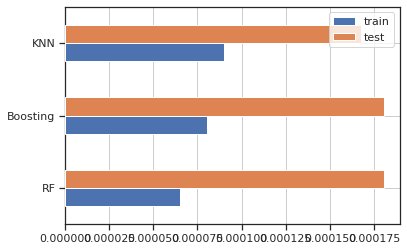

In [50]:
# membuat plot metrik evaluasi
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan bar chart di atas dapat terlihat bahwa model dengan algoritma Random Forest (RF) memberikan nilai MSE yang paling kecil, sedangkan model dengan algoritma K-Nearest Neighbor (KNN) memberikan nilai MSE yang paling besar. 

Sebelum menarik kesimpulan terkait model terbaik untuk memprediksi probabilitas gagal jantung (_Heart Disease_) kita akan melakukan uji coba prediksi menggunakan beberapa sampel acak pada data uji sebagai berikut.

**Menguji Menggunakan beberapa Sampel Acak dari Dataset**

In [51]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(2)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
444,1,0.65,0.85,0.90
59,1,0.60,0.84,0.90
917,0,0.30,0.02,0.02
221,1,0.65,0.83,0.71
636,0,0.35,0.70,0.80


##**Kesimpulan**

* Berdasarkan _Correlation Matrix_ dapat dilihat bahwa fitur yang memiliki korelasi cukup kuat dibandingkan fitur lainnya dengan fitur Heart Disease (target) adalah fitur `Oldpeak` (skor korelasi 0.52) dan `MaxHR` (skor korelasi -0.38).

* Berdasarkan hasil evaluasi dapat disimpulkan bahwa model terbaik untuk prediksi adalah model dengan algoritma Random Forest (RF). Dengan pengaturan parameter n_estimators = 60 dan max_depth = 4 didapatkan nilai metrik terkecil jika dibandingkan dengan model algoritma lain, yakni _Mean Squared Error_ (MSE) sebesar 0.000065 (data latih) dan 0.00018 (data uji). Selain itu pada uji prediksi menggunakan sampel acak dapat terlihat bahwa model Random Forest mampu secara signifikan memprediksi mendekati hasil yang benar.

## **Daftar Referensi**

[1] Murti, Tyan Adhi Kurnia and , Ns. Beti Kristinawati, M.Kep., Sp. Kep. M.B (2019) Gambaran Lama Hari Rawat Pasien Gagal Jantung di Rsud Dr.Moewardi Kota Surakarta. Skripsi thesis, Universitas Muhammadiyah Surakarta. [[Link]](http://eprints.ums.ac.id/73699/3/BAB%20I.pdf)

[2] S. P. Tamba and E. -, “PREDIKSI PENYAKIT GAGAL JANTUNG DENGAN MENGGUNAKAN RANDOM FOREST”, JUSIKOM PRIMA, vol. 5, no. 2, pp. 176 - 181, Mar. 2022. [[Link]](http://jurnal.unprimdn.ac.id/index.php/JUSIKOM/article/view/2445/1498) 

[5] fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.